<a href="https://colab.research.google.com/github/Phi142/B-i-t-p-1-AI-Tr-n-Minh-Phi-20146515/blob/main/Tuan12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import cifar100 
from keras.utils import to_categorical #lenh chuyen 2 chieu thanh 1 chieu

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

print(x_train.shape) 
print(y_train.shape) 
print(x_test.shape) 
print(y_test.shape)

169001437/169001437 [==============================] - 4s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
x_train = x_train.reshape((50000, 32*32*3))
x_train = x_train.astype('float32')/255
x_test = x_test.reshape((10000, 32*32*3))
x_test = x_test.astype('float32')/255

y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

In [ ]:
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,Input
from keras.optimizers import Adam
from keras import losses
loss = losses

In [ ]:
from keras.layers import LeakyReLU
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', input_shape = (40, 40, 3), padding= 'same'))
model.add(LeakyReLU(alpha = 0.1))
#Add Dropout
model.add(Dropout(0.25))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
#Add Dropout
model.add(Dropout(0.25))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
#Add Dropout
model.add(Dropout(0.25))

In [ ]:

from keras.losses import categorical_crossentropy
model.add(Flatten())
model.add(Dense(128, activation = 'linear'))
#Add Dropout
model.add(Dropout(0.25))

model.add(Dense(100, activation = 'softmax'))
model.summary()

In [ ]:
#Tao mo hinh
model = Sequential()
model.add(Dense(2000, input_shape=(32*32*3,), activation = 'relu')) #input_shape chỉ có 1 chiều, nên sau phẩy ko cần ghi gì
model.add(Dense(1000, activation = 'relu'))
model.add(Dense(100, activation = 'softmax'))
model.summary()

In [ ]:
#compile
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = 'accuracy') #bộ tối ưu 'rmsprop', mất mát 'categorical_crossentropy'

#train
train = model.fit(x_train, y_train, epochs = 10, batch_size = 128) #lô học chỉ là 128 dữ liệu thôi (không học 60000 dữ liệu), học 10 lần -> mỗi lần học 128

Epoch 1/10
391/391 [==============================] - 66s 168ms/step - loss: 4.2862 - accuracy: 0.0684
Epoch 2/10
391/391 [==============================] - 69s 178ms/step - loss: 3.7193 - accuracy: 0.1325
Epoch 3/10
391/391 [==============================] - 66s 169ms/step - loss: 3.5310 - accuracy: 0.1640
Epoch 4/10
391/391 [==============================] - 67s 172ms/step - loss: 3.4054 - accuracy: 0.1893
Epoch 5/10
391/391 [==============================] - 81s 208ms/step - loss: 3.2998 - accuracy: 0.2056
Epoch 6/10
391/391 [==============================] - 80s 203ms/step - loss: 3.2032 - accuracy: 0.2245
Epoch 7/10
391/391 [==============================] - 75s 193ms/step - loss: 3.1205 - accuracy: 0.2413
Epoch 8/10
391/391 [==============================] - 81s 206ms/step - loss: 3.0449 - accuracy: 0.2544
Epoch 9/10
391/391 [==============================] - 69s 177ms/step - loss: 2.9654 - accuracy: 0.2692
Epoch 10/10
391/391 [==============================] - 75s 193ms/step - l

In [ ]:
import pandas as pd
pd.DataFrame(train.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

In [ ]:
#đánh giá độ chính xác
test_loss, test_acc = model.evaluate(x_test, y_test)

print('test_accuracy: ', test_acc)
print('test_loss: ', test_loss)

In [ ]:
!git clone https://github.com/ipazc/mtcnn.git
!git clone https://github.com/ageitgey/face_recognition.git  

Cloning into 'mtcnn'...
remote: Enumerating objects: 221, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 221 (delta 8), reused 14 (delta 5), pack-reused 194
Receiving objects: 100% (221/221), 2.82 MiB | 3.60 MiB/s, done.
Resolving deltas: 100% (112/112), done.
Cloning into 'face_recognition'...
remote: Enumerating objects: 1028, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 1028 (delta 5), reused 6 (delta 1), pack-reused 1014
Receiving objects: 100% (1028/1028), 101.52 MiB | 28.35 MiB/s, done.
Resolving deltas: 100% (579/579), done.


In [ ]:
!apt-get install build-essential cmake
!apt-get install libopenblas-dev liblapack-dev 
!pip3 install dlib
!pip3 install face_recognition
!pip3 install mtcnn
!pip3 install opencv-contrib-python
!ls -la face_recognition/tests/test_images/

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.8ubuntu1.1).
cmake is already the newest version (3.16.3-1ubuntu1.20.04.1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
liblapack-dev is already the newest version (3.9.0-1build1).
libopenblas-dev is already the newest version (0.3.8+ds-1ubuntu0.20.04.1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
total 3152
drwxr-xr-x 

In [ ]:
from matplotlib import pyplot as plt
from mtcnn import MTCNN
filename = '/content/drive/MyDrive/AI/GOIN (4).jpg'
pixels = plt.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(pixels)
for face in faces:
  print(face)

'''
box[x, y, width, height]
confidence (accuracy)
keypoints
'''

1/1 [==============================] - 0s 250ms/step


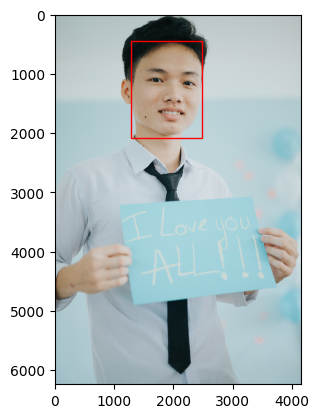

In [ ]:
from matplotlib import pyplot as plt
from mtcnn import MTCNN
filename='/content/drive/MyDrive/AI/IMG_1280.jpg'
img=plt.imread(filename)# Doc file
detector = MTCNN()
faces=detector.detect_faces(img)

plt.imshow(img)

ax = plt.gca()
for face in faces:
  x, y, width, height = face['box']
  rect = plt.Rectangle((x,y), width, height, fill = False, color = 'red')
  ax.add_patch(rect)

plt.show()

2/2 [==============================] - 0s 16ms/step


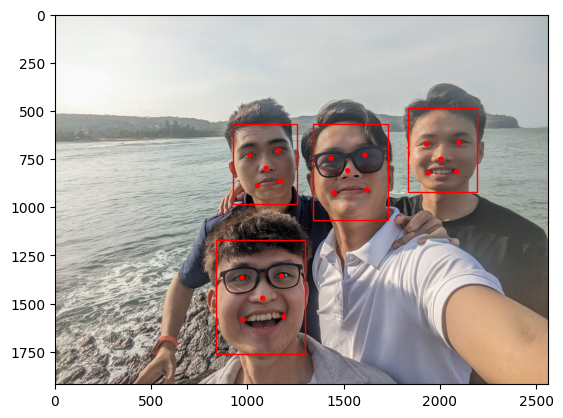

In [ ]:
from matplotlib import pyplot as plt
from mtcnn import MTCNN
filename='/content/drive/MyDrive/AI/IMG_1677834632745_1677834827743.jpg'
img=plt.imread(filename)# Doc file
detector = MTCNN()
faces=detector.detect_faces(img)

plt.imshow(img)

ax = plt.gca()
for face in faces:
  x, y, width, height = face['box'] # Ve hinh chu nhat 
  rect = plt.Rectangle((x,y), width, height, fill = False, color = 'red')
  ax.add_patch(rect) # chồng ảnh lên, bắt buộc phải có
  for key,value in face['keypoints'].items():
      dot=plt.Circle(value,radius=10, color='red')
      ax.add_patch(dot)
      
plt.show()

2/2 [==============================] - 0s 15ms/step


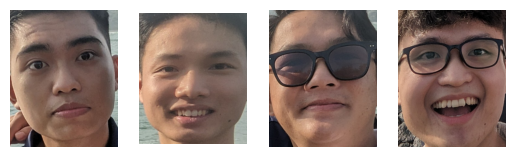

In [ ]:
import matplotlib.pyplot as plt
from mtcnn import MTCNN

def draw_faces(filename, result_list):
  data = plt.imread(filename)
  for i in range(len(result_list)):
    x1,y1,width,height = result_list[i]['box']
    x2,y2 = x1 + width, y1 + height
    plt.subplot(1, len(result_list), i+1)
    plt.axis('off')
    plt.imshow(data[y1:y2,x1:x2])
  plt.show()

filename = '/content/drive/MyDrive/AI/IMG_1677834632745_1677834827743.jpg'
img = plt.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(img)
draw_faces(filename, faces)
plt.savefig('anhtach.jpg')

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)

img_path = '/content/drive/MyDrive/AI/download.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 [==============================] - 1s 733ms/step
Predicted: [('n02124075', 'Egyptian_cat', 0.67529863), ('n02123045', 'tabby', 0.16746868), ('n02123159', 'tiger_cat', 0.14251742)]


In [58]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = '/content/drive/MyDrive/AI/ca-heo-song-o-dau.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 [==============================] - 3s 3s/step
Predicted: [('n02071294', 'killer_whale', 0.9362548), ('n01491361', 'tiger_shark', 0.022233875), ('n01498041', 'stingray', 0.006145979)]
